In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import math

df = pd.read_csv("process_digitize8.csv")

def div_1k(integer):
    return(integer/1000)

def log_transform(num):
    return(np.log(num))

# dich_hf_ls =[]
# dich_my_sent=[]

# for i in hug_face_sntmt_ls:
#     if i > 0.5:
#         dich_hf_ls.append(1)
#     else:
#         dich_hf_ls.append(0)

# for k in my_sent_ls:
#     if k>0.5:
#         dich_my_sent.append(1)
#     else:
#         dich_my_sent.append(0)
        
# df["dich_hf_sent"]=dich_hf_ls
# df["dich_my_sent"]=dich_my_sent

comment_count_ls = df.comment_count.values.tolist()
digg_count_ls = df.digg_count.values.tolist()
download_count_ls = df.download_count.values.tolist()
share_count_ls = df.share_count.values.tolist()
duration_ls = list(map(div_1k, df.duration.values.tolist()))
hug_face_sntmt_ls = df.hf_sent.values.tolist()
my_sent_ls = df.my_sent.values.tolist()
dich_hug_face_sntmt_ls = df.dich_hf_sent.values.tolist()
dich_my_sent_ls = df.dich_my_sent.values.tolist()

log_duration_ls = list(map(lambda x: log_transform(x), duration_ls))
log_share_count_ls = list(map(lambda x: log_transform(x+1), share_count_ls))
log_download_count_ls = list(map(lambda x: log_transform(x+1), download_count_ls))
log_digg_count_ls = list(map(log_transform, digg_count_ls))
log_comment_count_ls = list(map(log_transform, comment_count_ls))
sqrt_hug_face_sntmt_ls = list(map(lambda x: log_transform(x), hug_face_sntmt_ls))

df["log_download_count_ls"]=log_download_count_ls
df["log_share_count_ls"]=log_share_count_ls
df["log_digg_count_ls"]=log_digg_count_ls
df["log_comment_count_ls"]=log_comment_count_ls
df.head()


,aweme_id,comment_count,digg_count,download_count,share_count,duration,my_sent,hf_sent,dich_hf_sent,dich_my_sent,log_download_count_ls,log_share_count_ls,log_digg_count_ls,log_comment_count_ls
0,7095448791456828677,492,272290,237,193,11608,0.673469,0.747775,1,1,5.472271,5.267858,12.514623,6.198479
1,6931413133177212165,108607,9033022,105736,158954,12420,0.543478,0.618055,1,1,11.568710,11.976376,16.016398,11.595491
2,6892810075522583809,32412,8637829,40052,30442,45184,0.571429,0.570590,1,1,10.597959,10.323611,15.971662,10.386284
3,7257647953253272858,26,14486,4,17,8434,0.333333,0.350899,0,0,1.609438,2.890372,9.580938,3.258097
4,7257583218814242075,116,39134,7,130,114800,0.312500,0.520185,1,0,2.079442,4.875197,10.574747,4.753590


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

features = ['log_comment_count_ls', 'log_digg_count_ls', 'log_download_count_ls', 'log_share_count_ls']
#['log_comment_count_ls', 'log_digg_count_ls', 'log_download_count_ls', 'log_share_count_ls']

x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1'])

pc_ls = principalDf.principal_component_1.values.tolist()

df["principal_component"] = pc_ls
df.head()

# log_pc_ls = list(map(lambda x: log_transform(x+1), pc_ls))
# print(len(log_pc_ls))


,aweme_id,comment_count,digg_count,download_count,share_count,duration,my_sent,hf_sent,dich_hf_sent,dich_my_sent,log_download_count_ls,log_share_count_ls,log_digg_count_ls,log_comment_count_ls,principal_component
0,7095448791456828677,492,272290,237,193,11608,0.673469,0.747775,1,1,5.472271,5.267858,12.514623,6.198479,-0.028462
1,6931413133177212165,108607,9033022,105736,158954,12420,0.543478,0.618055,1,1,11.568710,11.976376,16.016398,11.595491,5.029981
2,6892810075522583809,32412,8637829,40052,30442,45184,0.571429,0.570590,1,1,10.597959,10.323611,15.971662,10.386284,4.132300
3,7257647953253272858,26,14486,4,17,8434,0.333333,0.350899,0,0,1.609438,2.890372,9.580938,3.258097,-2.871326
4,7257583218814242075,116,39134,7,130,114800,0.312500,0.520185,1,0,2.079442,4.875197,10.574747,4.753590,-1.669488


In [40]:
import numpy as np

df2 = df.loc[:, ["duration", "principal_component"]]
df3 = df2[df2.duration > 47000]
df4 = df2[df.duration <= 47000]

duration_under_47000 = df4.principal_component.values.tolist()
duration_over_47000 = df3.principal_component.values.tolist()

print("Median: under, over")
print(np.median(duration_under_47000))
print(np.median(duration_over_47000))

print("\nMean: under, over")
print(np.mean(duration_under_47000))
print(np.mean(duration_over_47000))

print("\nQuantile: under, over")
print(df4.principal_component.quantile([0.25,0.5,0.75]))
print(df3.principal_component.quantile([0.25,0.5,0.75]))

print("\nMin, Max: Under, Over")
print(min(duration_under_47000), max(duration_under_47000))
print(min(duration_over_47000), max(duration_over_47000))

print("\n STD: Under, Over")
print(np.std(duration_under_47000))
print(np.std(duration_over_47000))

Median: under, over
0.006959519102713278
-0.2917761985131273

Mean: under, over
0.042254790268881674
-0.1859210771830791

Quantile: under, over
0.25   -1.641685
0.50    0.006960
0.75    1.582784
Name: principal_component, dtype: float64
0.25   -1.364652
0.50   -0.291776
0.75    0.943064
Name: principal_component, dtype: float64

Min, Max: Under, Over
-4.418339613440948 5.1663692922375075
-3.2999774977436123 3.8658072945205553

 STD: Under, Over
1.9400336629455313
1.4923034729508873


In [84]:
from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(dich_hug_face_sntmt_ls, dich_my_sent_ls))

0.4584994153076237


In [20]:
# Importing library
import scipy.stats as stats
  
# Performing the paired sample t-test
stats.ttest_rel(my_sent_ls, hug_face_sntmt_ls)

Ttest_relResult(statistic=-14.645906467354674, pvalue=9.306543986693947e-42)

Pearsons correlation: 0.041
p-val 0.31922203226465856
SpearmanrResult(correlation=0.06878246524165924, pvalue=0.09396818834611047)


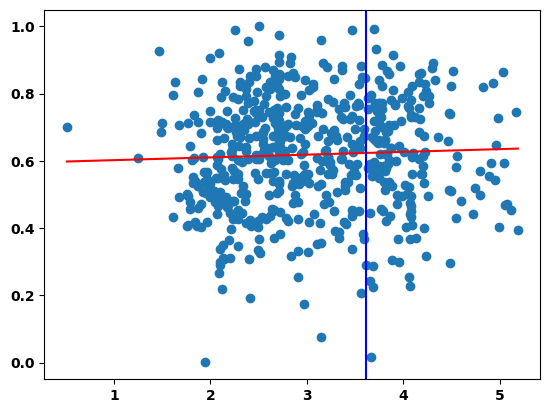

In [47]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import numpy


corr, p = pearsonr(log_duration_ls, hug_face_sntmt_ls)
print('Pearsons correlation: %.3f' % corr)
print("p-val", p)

print(spearmanr(log_duration_ls, hug_face_sntmt_ls))

mymodel = numpy.poly1d(numpy.polyfit(log_duration_ls, hug_face_sntmt_ls, 1))
myline = numpy.linspace(0.5134222496132567, 5.1890826893416095, 100)

# plt.xlabel("Logged Duration")
# plt.ylabel("Dependent Variable Principle Component")
plt.scatter(log_duration_ls, hug_face_sntmt_ls)
plt.plot(myline, mymodel(myline), color = "r")

plt.axvline(x = 3.61091791264, color = 'b', label = 'axvline - full height')

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 10}

# plt.rc('font', **font)

plt.show()
#component is measuring interactions, and people only interact when they complete the video usually, so it's measuring how many people complete the video
#if the avg of people who complete the video before the avg adult attention span is lower than the avg of people who complete the video after the attention span,
#we can show that less people completed the video after the avg adult attention span line because they just didnt want to finish the video

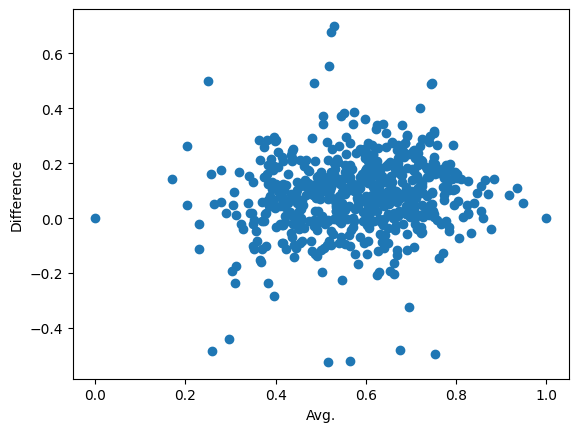

In [12]:
import matplotlib.pyplot as plt

avg_ls =[]
diff_ls=[]

for x, y in zip(hug_face_sntmt_ls, my_sent_ls):
    avg_ls.append((x+y)/2)
    diff_ls.append(x-y)
#Bland-Altman Plot
plt.xlabel("Avg.")
plt.ylabel("Difference")
plt.plot(np.array(avg_ls), np.array(diff_ls), "o")
plt.show()

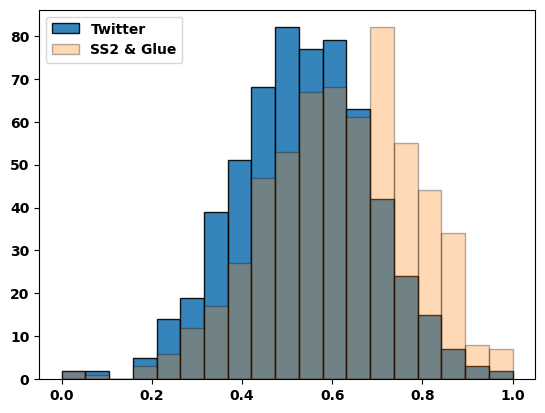

In [72]:
import seaborn as sns
from matplotlib import pyplot
import numpy

bins = numpy.linspace(0, 1, 20)

pyplot.hist(my_sent_ls, bins, alpha = 0.9, edgecolor = "black", label='Twitter',)
pyplot.hist(hug_face_sntmt_ls, bins, alpha = 0.3, edgecolor = "black", label='SS2 & Glue')
pyplot.legend(loc='upper left')
pyplot.show()

# visualizing plot using matplotlib.pyplot library
plt.show()

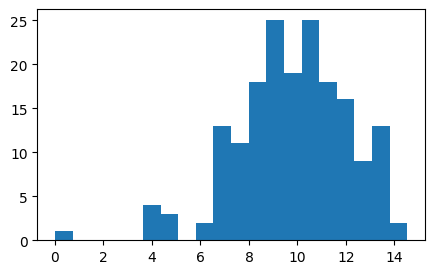

In [29]:
fig, axs = plt.subplots(figsize =(5, 3))
axs.hist(log_share_count_ls, bins = 20)
plt.show()

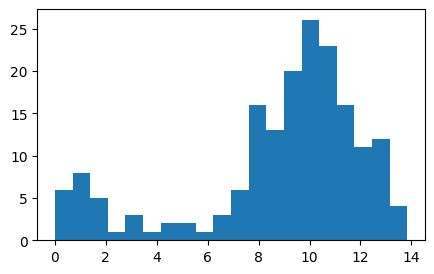

In [32]:
fig, axs = plt.subplots(figsize =(5, 3))
axs.hist(log_download_count_ls, bins = 20)
plt.show()

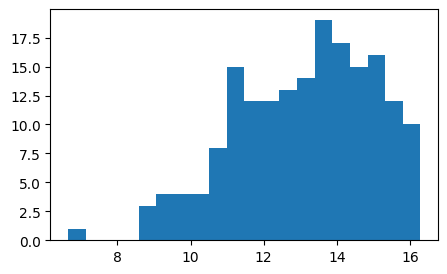

In [33]:
fig, axs = plt.subplots(figsize =(5, 3))
axs.hist(log_digg_count_ls, bins = 20)
plt.show()

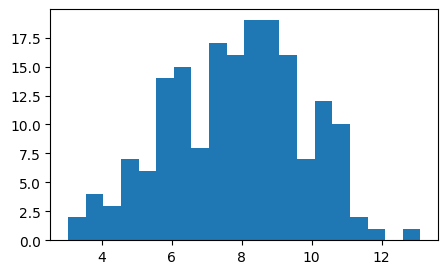

In [34]:
fig, axs = plt.subplots(figsize =(5, 3))
axs.hist(log_comment_count_ls, bins = 20)
plt.show()